In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from matplotlib.colors import LogNorm
import xarray as xr
import time
# my own 'library' below
from tree_regression import cf_tree_regression as cft
from importlib import reload

In [9]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

In [3]:
# make sure that changes in module are applied in j notebook
reload(cft)

<module 'tree_regression.cf_tree_regression' from '/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py'>

In [4]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.6
regtype = 'decision_tree'
max_depth_in=None

In [5]:
# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
# prepro.read_netcdf()
prepro.read_netcdf()
# prepro.proc_goalvar()
prepro.proc_goalvar()
# prepro.proc_inputvars()
prepro.proc_inputvars()
# prepro.proc_addvars()
prepro.proc_addvars()
prepro.split_data()
processed_data = prepro.get_processed_data()

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:70: UserWarning: Missing values in skew_l field were masked!
  warnings.warn("Missing values in {} field were masked!".format(var))


In [6]:
prepro.X_arr.shape

(9, 2304000)

In [6]:
# REGRESSION
goal_var_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

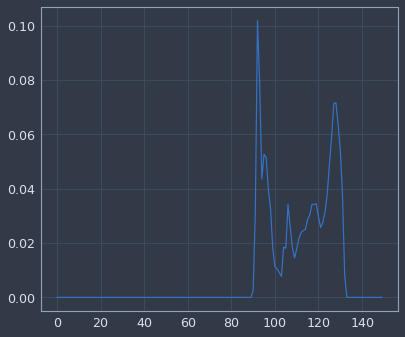

In [11]:
plt.plot(prepro.ds['cl_l'][15000][0])

In [7]:
prepro.ds.keys()

dict_keys(['time', 'zm', 'qcm', 'qim', 'qvm', 'qtm', 'qlm', 'qvlm', 'qsm', 'qsi', 'tm', 'pm', 'cl', 'cl_l', 'qvu', 'tu', 'qt_min', 'qt_max', 't_min', 't_max', 'skew', 'var_l', 'skew_l', 'var', 'var_t', 'betaq_msl', 'betap_msl', 'betaa_msl', 'betab_msl', 'betaq_p00', 'betap_p00', 'betaa_p00', 'betab_p00', 'betaq_p06', 'betap_p06', 'betaa_p06', 'betab_p06', 'betaa_zsl', 'betab_zsl', 'betap_zsl', 'betaq_zsl', 'betaa_1sl', 'betab_1sl', 'betap_1sl', 'betaq_1sl', 'sat_zm', 'sat_z1', 'cl_msl', 'cl_p00', 'cl_p06', 'cl_zsl', 'cl_rel', 'cl_1sl', 'betaa_3sl', 'betab_3sl', 'betap_3sl', 'betaq_3sl', 'sat_z3', 'cl_3sl', 'betaa_p03', 'betab_p03', 'betap_p03', 'betaq_p03', 'cl_p03'])

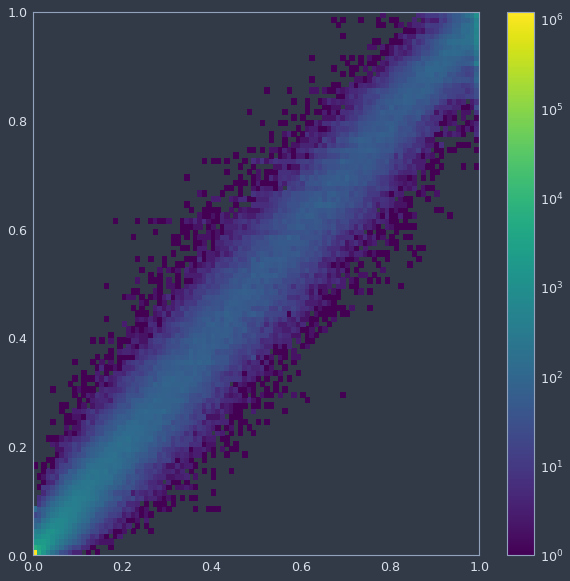

In [10]:
# VISUALISATION
cft.hist_plot(goal_var_pred, goalvar_eval)